# Potential from DFT

In [39]:
%load_ext autoreload
%autoreload 2

import numpy as np

from gpaw import GPAW, PW
from gpaw.utilities.ps2ae import PS2AE
from ase.io import read
from ase.lattice.hexagonal import Graphite
import matplotlib.pyplot as plt

from abtem.potentials import Potential
from abtem.waves import PlaneWaves
from abtem.dft import GPAWPotential
from abtem.plot import plot_atoms
from abtem.transform import orthogonalize_atoms

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


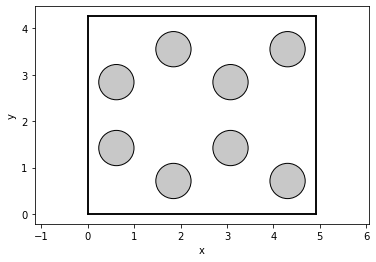

In [24]:
atoms = Graphite(symbol = 'C', latticeconstant = {'a' : 2.46, 'c' : 6.7})
atoms = orthogonalize_atoms(atoms)
atoms = atoms[atoms.positions[:,2] > 1]
atoms.center(vacuum=2, axis=2)
atoms.center()
atoms *= (2,1,1)

plot_atoms(atoms, scale_atoms=.5)

## Basic DFT calculation with GPAW

In [25]:
calc = GPAW(mode=PW(600), eigensolver = 'cg', h=.1, txt=None)
atoms.set_calculator(calc)
atoms.get_potential_energy()

-67.96874972908324

## Creating a DFT potential

In [26]:
potential_dft = GPAWPotential(calc, sampling=.05).precalculate()
potential_iam = Potential(atoms, sampling=.05).precalculate()

## Comparing the DFT potential to the IAM

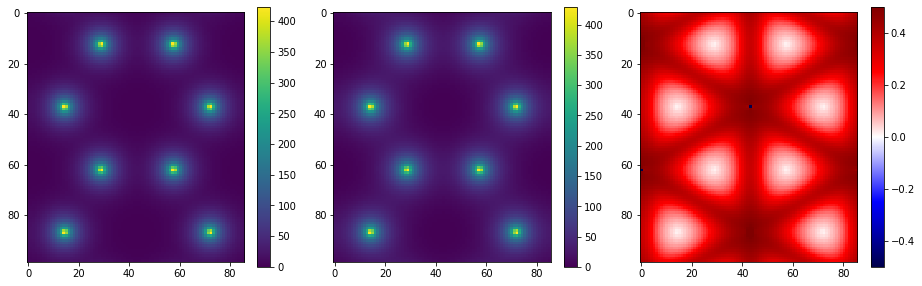

In [41]:
dft_slice = potential_dft.array.sum(0)
dft_slice -= dft_slice.min()
iam_slice = potential_iam.array.sum(0)
iam_slice -= iam_slice.min()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (13,4))
im1=ax1.imshow(dft_slice)
fig.colorbar(im1, ax=ax1)

im2=ax2.imshow(iam_slice)
fig.colorbar(im2, ax=ax2)

im3=ax3.imshow((iam_slice - dft_slice) / (iam_slice + 1e-12), cmap='seismic', vmin=-.5, vmax=.5)
fig.colorbar(im3, ax=ax3)

plt.tight_layout()